# CA Prop 64 Analysis
### From the class Python for Data Journalists: Analyzing Money in Politics
***

In [4]:
import pandas as pd

In [5]:
%matplotlib inline

Reading in the lists of propositions and committees from CSV

In [6]:
props = pd.read_csv("http://www.firstpythonnotebook.org/_static/committees.csv")

In [8]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ocd_prop_id               102 non-null object
calaccess_prop_id         102 non-null int64
ccdc_prop_id              102 non-null int64
prop_name                 102 non-null object
ccdc_committee_id         102 non-null int64
calaccess_committee_id    102 non-null int64
committee_name            102 non-null object
committee_position        102 non-null object
dtypes: int64(4), object(4)
memory usage: 4.8+ KB


In [7]:
props.head(1)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
0,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,382,1374469,YES ON PROPOSITION 51 - CALIFORNIANS FOR QUALI...,SUPPORT


Read in the list of contributions to ballot measures

In [9]:
contribs = pd.read_csv("http://www.firstpythonnotebook.org/_static/contributions.csv")

In [10]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 3.3+ MB


In [80]:
contribs.head(1)

,calaccess_committee_id,committee_name,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,BERGMAN,GRETCHEN,SPRING VALLEY,CA,91978,A NEW PATH,EXECUTIVE DIRECTOR,False,84.0


How many committees for each proposition

In [12]:
props.prop_name.value_counts().reset_index()

,index,prop_name
0,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,13
1,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,12
2,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,11
3,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,9
4,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,8
5,PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON...,7
6,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,7
7,"PROPOSITION 059- SB 254 (CHAPTER 20, STATUTES ...",6
8,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,4
9,PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...,4


Saving all committees supporting/opposing Prop 64

In [14]:
p64 = props[props.prop_name == "PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE."]

In [15]:
p64.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 74 to 84
Data columns (total 8 columns):
ocd_prop_id               11 non-null object
calaccess_prop_id         11 non-null int64
ccdc_prop_id              11 non-null int64
prop_name                 11 non-null object
ccdc_committee_id         11 non-null int64
calaccess_committee_id    11 non-null int64
committee_name            11 non-null object
committee_position        11 non-null object
dtypes: int64(4), object(4)
memory usage: 616.0+ bytes


Inner join contribution information on Prop 64

In [16]:
contribsOnP64 = pd.merge(p64, contribs, on="calaccess_committee_id")

In [17]:
contribsOnP64.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 859
Data columns (total 20 columns):
ocd_prop_id                     860 non-null object
calaccess_prop_id               860 non-null int64
ccdc_prop_id                    860 non-null int64
prop_name                       860 non-null object
ccdc_committee_id               860 non-null int64
calaccess_committee_id          860 non-null int64
committee_name_x                860 non-null object
committee_position              860 non-null object
committee_name_y                860 non-null object
calaccess_filing_id             860 non-null int64
date_received                   860 non-null object
contributor_lastname            860 non-null object
contributor_firstname           750 non-null object
contributor_city                860 non-null object
contributor_state               860 non-null object
contributor_zip                 860 non-null object
contributor_employer            657 non-null object
contributor_occu

Total money given supporting/opposing Prop 64 (itemized contributions - large donations)

In [18]:
contribsOnP64.amount.sum()

35177017.640000001

How many contributions supporting/opposing Prop 64

In [19]:
contribsOnP64.committee_position.value_counts()

SUPPORT    762
OPPOSE      98
Name: committee_position, dtype: int64

Percentage of amount given towards Prop 64 from supporters

In [20]:
support64 = contribsOnP64[contribsOnP64.committee_position == "SUPPORT"]

In [21]:
oppose64 = contribsOnP64[contribsOnP64.committee_position == "OPPOSE"]

In [81]:
percent_support = support64.amount.sum() / contribsOnP64.amount.sum()

In [82]:
percent_support * 100

92.889642704798675

Individual contributions by amount

In [84]:
contribsOnP64.sort_values("amount", ascending=False).head(5)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
142,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,4000000.0
79,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",NaN,SACRAMENTO,CA,95815,NaN,NaN,False,2000000.0
846,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,464,1385506,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",SUPPORT,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",2083608,2016-09-15,FUND FOR POLICY REFORM (NONPROFIT 501 (C)(4)),NaN,NEW YORK,NY,10019,NaN,NaN,False,1970000.0
851,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
852,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0


Contributions by committee

In [26]:
contribsOnP64.groupby("committee_name_x").amount.sum().reset_index().sort_values("amount", ascending=False)

,committee_name_x,amount
10,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",15734047.00
4,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),6140000.00
3,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",4470000.00
7,NEW APPROACH PAC (MPO),3865000.00
9,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",1364000.00
8,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",1130930.00
1,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",860470.00
2,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",850000.00
5,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",739200.00
0,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,17089.00


Top contributors sorted by descending amount

In [87]:
contribsOnP64.groupby(
    ["contributor_firstname", "contributor_lastname", "committee_position"]
).amount.sum().reset_index().sort_values("amount", ascending=False).head()

,contributor_firstname,contributor_lastname,committee_position,amount
483,SEAN,PARKER AND AFFILIATED ENTITIES,SUPPORT,7250000.0
482,SEAN,PARKER,SUPPORT,1500000.0
281,JULIE,SCHAUER,OPPOSE,1364000.0
108,DANIEL,LEWIS,SUPPORT,1250000.0
194,HENRY,VAN AMERINGEN,SUPPORT,1000000.0


Top supporters of Prop 64

In [28]:
top_supporters = support64.groupby(
    ["contributor_firstname", "contributor_lastname"]
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

In [29]:
top_supporters.head(10)

,contributor_firstname,contributor_lastname,amount
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
443,SEAN,PARKER,1500000.0
102,DANIEL,LEWIS,1250000.0
180,HENRY,VAN AMERINGEN,1000000.0
374,NICHOLAS,PRITZKER,900000.0
390,PETER,THIEL,300000.0
421,ROGER,JENKINS,75000.0
22,ANGELA,HOWARD,65000.0
297,LAWRENCE,HESS,30000.0
425,ROGER B.,MCNAMEE,10000.0


Simple bar chart of top supporters

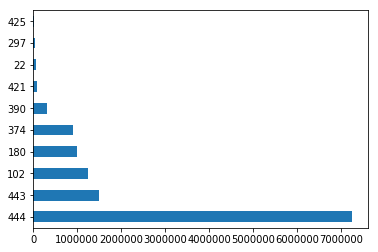

In [31]:
top_supporters.amount.plot.barh()

Set y-axis labels using last names

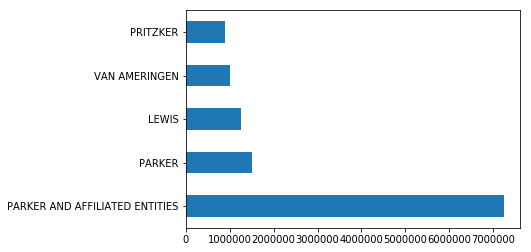

In [32]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_lastname)

Combine first and last names in a new column

In [33]:
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

In [34]:
top_supporters.head()

,contributor_firstname,contributor_lastname,amount,contributor_fullname
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0,SEAN PARKER AND AFFILIATED ENTITIES
443,SEAN,PARKER,1500000.0,SEAN PARKER
102,DANIEL,LEWIS,1250000.0,DANIEL LEWIS
180,HENRY,VAN AMERINGEN,1000000.0,HENRY VAN AMERINGEN
374,NICHOLAS,PRITZKER,900000.0,NICHOLAS PRITZKER


Set y-axis labels as new full names

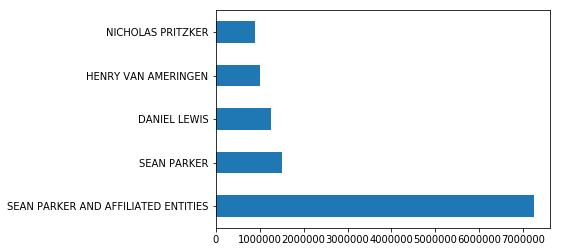

In [88]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_fullname)

Combine Sean Parker rows (top supporter)

In [61]:
def combine_names(row):
    if row.contributor_fullname.startswith('SEAN PARKER'):
        return 'SEAN PARKER'
    return row.contributor_fullname

In [62]:
top_supporters['contributor_cleanname'] = top_supporters.apply(combine_names, axis=1)

In [63]:
cleaned_series = top_supporters.groupby(
    "contributor_cleanname"
).amount.sum().reset_index().sort_values("amount", ascending=False).head(5)

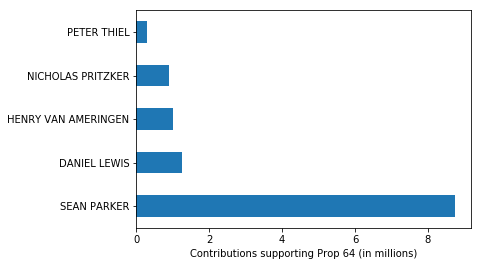

In [77]:
chart = cleaned_series.amount.plot.barh()
chart.set_yticklabels(cleaned_series.contributor_cleanname)
chart.set_xticklabels([0, 2, 4, 6, 8])
chart.set_xlabel("Contributions supporting Prop 64 (in millions)")

Export top 5 supporters to CSV

In [89]:
cleaned_series.to_csv("top_supporters.csv")

![Top Supporterss of Prop 64](chartbuilder.png)